## Complemento de series de Taylor
Para poder calcular series de Taylor, a veces puede resultar fácil hacer el cálculo de la derivada y deducir la serie infinita que representará la función desde el punto que queremos aproximar. Por ejemplo, tomemos la función $y = sen(x)$, y hagamos las aproximaciones desde los puntos $x_0=\pi/2$ y $x_1=3\pi/2$. Como se sabe, los valores de la función seno son conocidos en dichos puntos: $f(x_0)=1$ y $f(x_1)=-1$. 

Podemos empezar por calcular los valores de las derivadas hasta el orden 4: 
$$f(x) = sen(x) \rightarrow f(x_0) = 1 \rightarrow f(x_1) = -1$$
$$f'(x) = cos(x) \rightarrow f'(x_0)=0 \rightarrow f'(x_1)=0$$
$$f''(x) = -sen(x) \rightarrow f''(x_0)=-1 \rightarrow f''(x_1)=1$$
$$f'''(x) = -cos(x) \rightarrow f'''(x_0) = 0 \rightarrow f'''(x_1) = 0$$
$$f''''(x)= sen(x) \rightarrow f''''(x_0)=1 \rightarrow f''''(x_1) = -1$$

Si reemplazamos dichos valores en la definición de las series de Taylor, obtendremos la siguiente expresión para el punto $x_0$: 

$$f(x) = 1 + \frac{0}{1!}(x-\pi/2) - \frac{1}{2!}(x-\pi/2)^2 + \frac{0}{3!}(x-\pi/2)^3 - ...$$

Ahora, si eliminamos los términos cero de la serie y compactamos todo en una sumatoria, tendremos: 

$$f(x) = \sum_{n=0}^{\infty} (-1)^n\frac{(x - \pi/2)^{2n}}{(2n)!}$$

Para que practique, haga este mismo desarrollo para la serie que empieza en el punto $3\pi/2$.

In [1]:
# No se le olvide importar las librerías
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Puntos iniciales
x0 = np.pi / 2
x1 = 3 * np.pi / 2

# Los dos vectores del dominio de la función
X0 = np.linspace(x0 - np.pi / 2, x0 + np.pi / 2, 200)
X1 = np.linspace(x1 - np.pi / 2, x1 + np.pi / 2, 200)

# Calculando los rangos de las funciones
Y0 = np.sin(X0)
Y1 = np.sin(X1)

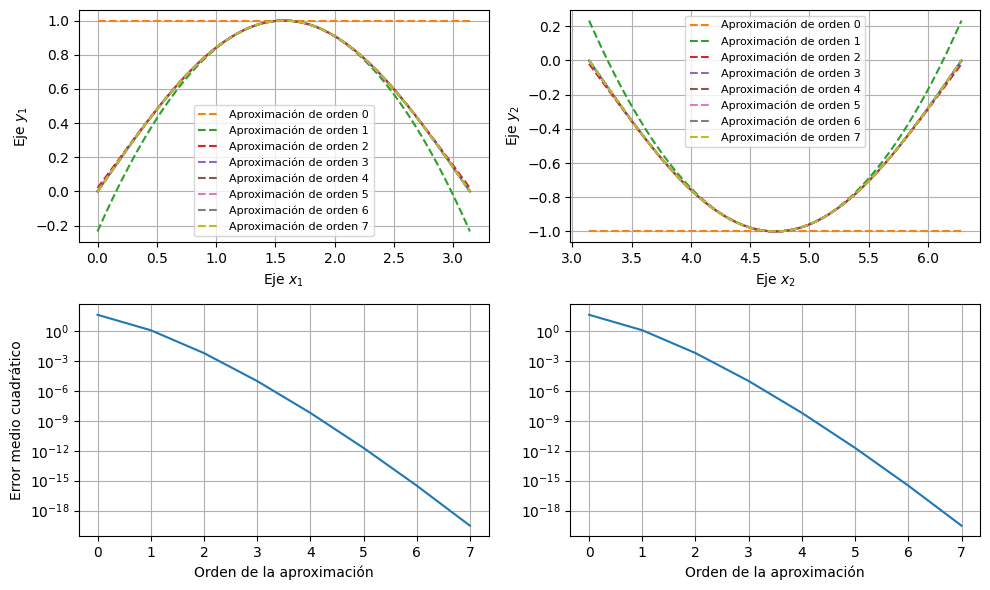

In [46]:
# Aproximaciones
n = 8 # Numero de términos que quiero que aparezcan en la serie

# Definiendo los vectores donde se guardan las aproximaciones de la función
fx0 = np.zeros_like(X0)
fx1 = np.zeros_like(X1)

# Definiendo vectores para almacenar error
oE = []
E1 = [] 
E2 = []

# Graficando
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

ax[0, 0].plot(X0, Y0)
ax[0, 1].plot(X1, Y1)

for i in range(0, n):
    # Aproximación de pi/2
    fx0 += (-1) ** i * (X0 - x0) ** (2 * i) / (np.math.factorial(2 * i))
    nombre1 = 'Aproximación de orden %.0f'%(i)
    ax[0, 0].plot(X0, fx0, label=nombre1, linestyle='--')

    # Aproximación desde 3 pi / 2
    fx1 += (-1) ** (i + 1) * (X1 - x1) ** (2 * i) / np.math.factorial(2 * i)
    ax[0, 1].plot(X1, fx1, label=nombre1, linestyle='--')

    # Recolectando error de la aproximación
    oE.append(i)
    E1.append(np.linalg.norm(fx0 - Y0) ** 2)
    E2.append(np.linalg.norm(fx1 - Y1) ** 2)

# Estas son las gráficas de los errores en semilogarítmico. Es decir, el eje
# x está en escala normal, y el eje y en escala logarítmica
ax[1, 0].semilogy(oE, E1)
ax[1, 1].semilogy(oE, E2)

# Comandos para poder títulos y cosas en el área de gráficos
ax[0, 0].set_xlabel('Eje $x_1$')
ax[0, 1].set_xlabel('Eje $x_2$')
ax[0, 0].set_ylabel('Eje $y_1$')
ax[0, 1].set_ylabel('Eje $y_2$')
ax[1, 0].set_ylabel('Error medio cuadrático')
ax[1, 0].set_xlabel('Orden de la aproximación')
ax[1, 1].set_xlabel('Orden de la aproximación')

# Encendiendo las cuadrículas en los 4 gráficos
ax[0, 0].grid()
ax[0, 1].grid()
ax[1, 0].grid()
ax[1, 1].grid()

# Poniendo las leyendas en los lugares que aplica
ax[0, 0].legend(fontsize=8)
ax[0, 1].legend(fontsize=8)
plt.tight_layout()